In [117]:
import pandas as pd
import numpy as np
import os

In [118]:
Group1_scores = []
Group2_scores = []
Group3_scores = []

def emotion_definer(emotions):
    emotions = emotions.split(";")
    emotions = [x.strip(' ') for x in emotions]
    valence_score = []
    arousal_score = []
    for emotion in emotions:
        emotion = emotion.lower()
        if emotion == 'happy' or emotion == 'immersed':
            valence_score.append(1)
            arousal_score.append(0)
        elif emotion == 'sad':
            valence_score.append(-1)
            arousal_score.append(0)
        elif emotion == 'angry' or 'frustrated' in emotion or 'annoyed' in emotion:
            valence_score.append(-0.5)
            arousal_score.append(1)
        elif emotion == 'tense' or emotion == 'confused':
            valence_score.append(-0.25)
            arousal_score.append(1)
        elif emotion == 'relaxed' or emotion == 'intrigued' or emotion == 'interest':
            valence_score.append(0.5)
            arousal_score.append(-1)
        elif emotion == 'excited' or emotion == 'hyped up' or emotion == 'hypedup':
            valence_score.append(0.5)
            arousal_score.append(1)
        elif emotion == 'delighted':
            valence_score.append(1)
            arousal_score.append(1)
        elif emotion == 'bored':
            valence_score.append(-1)
            arousal_score.append(-1)
        elif emotion == 'content':
            valence_score.append(1)
            arousal_score.append(-0.25)
        elif emotion == 'calm' or emotion == 'mellow':
            valence_score.append(0)
            arousal_score.append(-1)
        elif emotion == 'sleepy' or emotion == 'tired':
            valence_score.append(0)
            arousal_score.append(-1)
        elif emotion == 'nervous' or 'anxious' in emotion or emotion == 'scared':
            valence_score.append(-1)
            arousal_score.append(0.25)
        elif emotion == 'alright' or emotion == 'fine' or emotion == 'other':
            valence_score.append(0)
            arousal_score.append(0)
        
    if not valence_score:
        valence_score.append(0)
    if not arousal_score:
        arousal_score.append(0)

    val = np.mean(valence_score)
    aro = np.mean(arousal_score)

    if val is np.nan:
        val = 0
    if aro is np.nan:
        aro = 0
        
    return (val, aro)
        
        
        
    
def load_Scores(location):
    print(location)
    folder = location[:-19]
    print(folder)
    var = os.listdir(folder)
    group = ''

    if "Group 1" in location:
        group = "Group 1"
    elif "Group 2" in location:
        group = "Group 2"
    elif "Group 3" in location:
        group = "Group 3"
        folder = folder + "/"

    for file in var:
        if group in file:
            if "xlsx" in file:
                location = folder + file
                data = pd.read_excel(location)
            elif "csv" in file:
                location = folder + file
                data = pd.read_csv(location)


    if "How would you rate this performance?" in data.columns:
        order = data["Watch ID"]
        scores = data["How would you rate this performance?"]
    elif "How did you rate the performance?" in data.columns:
        order = data["Watch ID"]
        scores  = data["How did you rate the performance?"]
    elif "How would you rate this performance?（10 is the best）" in data.columns:
        order = data["ID"]
        scores  = data["How would you rate this performance?（10 is the best）"]

    if "How would you describe your feelings through the performance?" in data.columns:
        emotions = data["How would you describe your feelings through the performance?"]
    elif "How do you describe your feeling during the programme? You may make multiple choices.\n" in data.columns:
        emotions = data["How do you describe your feeling during the programme? You may make multiple choices.\n"]
        
    emotions = emotions.apply(emotion_definer)
        
    return scores, order, emotions


def match_scores_to_data(scores, scores_order, emotions, data, data_order):
    matched_scores = []
    matched_data = []
    matched_emotions = []

    # Zip the scores and order and the data and data order
    scores_zip = zip(scores_order, scores, emotions)
    data_zip = zip(data_order, data)

    # Sort the zipped lists by order
    scores_zip = sorted(scores_zip, key=lambda x: x[0])
    data_zip = sorted(data_zip, key=lambda x: x[0])

    # Unzip the sorted lists
    sorted_scores_order, sorted_scores, sorted_emotions = zip(*scores_zip)
    sorted_data_order, sorted_data = zip(*data_zip)

    # Match the scores to the data using the order of each
    for i in range(min(len(sorted_scores_order), len(sorted_data_order))):
        if sorted_scores_order[i] == sorted_data_order[i]:
            matched_scores.append(sorted_scores[i])
            matched_data.append(sorted_data[i])
            matched_emotions.append(emotions[i])
    return matched_scores, matched_data, matched_emotions

def load_data(location):
    data1_loc = location + "/group1_processed.csv"
    data2_loc = location + "/group2_processed.csv"
    data3_loc = location + "/group3_processed.csv"
    data1 = pd.read_csv(data1_loc)
    data2 = pd.read_csv(data2_loc)
    data3 = pd.read_csv(data3_loc)

    order1 = data1["Order"].values
    order2 = data2["Order"].values
    order3 = data3["Order"].values

    data1 = data1.drop(["Order"], axis=1).values.tolist()
    data2 = data2.drop(["Order"], axis=1).values.tolist()
    data3 = data3.drop(["Order"], axis=1).values.tolist()


    return data1, data2, data3, order1, order2, order3


try:
    Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("/mnt/ArtHeart/Data/Group 1 Scores.xlsx")
    Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("/mnt/ArtHeart/Data/Group 2 Scores.xlsx")
    Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("/mnt/ArtHeart/Data/Group 3 Scores.csv")
    Group1_processed, Group2_processed, Group3_processed, Group1_order, Group2_order, Group3_order = load_data("/mnt/ArtHeart/Data")
except:
    try:
        Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 1 Scores.xlsx")
        Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 2 Scores.xlsx")
        Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 3 Scores.csv")
        Group1_processed, Group2_processed, Group3_processed, Group1_order, Group2_order, Group3_order = load_data("W:\PhD\ArtHeart\Data")

    except:
        Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("Data/Group 1 Scores.xlsx")
        Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("Data/Group 2 Scores.xlsx")
        Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("Data/Group 3 Scores.csv")
        Group1_processed, Group2_processed, Group3_processed, Group1_order, Group2_order, Group3_order = load_data("Data")





#Group1_scores, Group1_processed, Group1_emotions = match_scores_to_data(Group1_scores, Group1_scores_order, Group1_emotions, Group1_processed, Group1_order)
Group2_scores, Group2_processed, Group2_emotions = match_scores_to_data(Group2_scores, Group2_scores_order, Group2_emotions, Group2_processed, Group2_order)
Group3_scores, Group3_processed, Group3_emotions = match_scores_to_data(Group3_scores, Group3_scores_order, Group3_emotions, Group3_processed, Group3_order)


/mnt/ArtHeart/Data/Group 1 Scores.xlsx
/mnt/ArtHeart/Data/
W:\PhD\ArtHeart\Data\Group 1 Scores.xlsx
W:\PhD\ArtHeart\Data\
Data/Group 1 Scores.xlsx
Data/
Data/Group 2 Scores.xlsx
Data/
Data/Group 3 Scores.csv
Data


In [119]:
# shape of data, shape of scores, shape of emotions
print(len(Group1_processed), len(Group1_scores), len(Group1_emotions))
print(len(Group2_processed), len(Group2_scores), len(Group2_emotions))
print(len(Group3_processed), len(Group3_scores), len(Group3_emotions))

37 32 32
30 30 30
30 30 30


In [120]:
from sklearn.preprocessing import StandardScaler
def score_calculator(scores, emotions):
    scores = np.array(scores)
    valence = np.array(emotions)[:,0]
    arousal = np.array(emotions)[:,1]
    valence_score = scores * valence
    arousal_score = scores * arousal

    std = StandardScaler()
    valence_score = std.fit_transform(valence_score.reshape(-1,1))
    arousal_score = std.fit_transform(arousal_score.reshape(-1,1))

    mean_valence = np.mean(valence_score)
    mean_arousal = np.mean(arousal_score)

    for i in range(len(valence_score)):
        if valence_score[i] > mean_valence:
            valence[i] = 1
        else:
            valence[i] = 0

        if arousal_score[i] > mean_arousal:
            arousal[i] = 1
        else:
            arousal[i] = 0

    return arousal, valence


#Group1_arousal, Group1_valence = score_calculator(Group1_scores, Group1_emotions)
Group2_arousal, Group2_valence = score_calculator(Group2_scores, Group2_emotions)
Group3_arousal, Group3_valence = score_calculator(Group3_scores, Group3_emotions)


In [121]:
def four_class_score_calculator(arousal, valence):
    zipped = list(zip(arousal, valence))
    result = []
    for i in zipped:
        if i == (0, 0):
            result.append(0)
        elif i == (0, 1):
            result.append(1)
        elif i == (1, 0):
            result.append(2)
        elif i == (1, 1):
            result.append(3)
    return result


Group_2_overall = four_class_score_calculator(Group2_arousal, Group2_valence)
Group_3_overall = four_class_score_calculator(Group3_arousal, Group3_valence)
    

In [122]:

print(Group2_arousal.shape)
print(Group2_valence.shape)

print(Group3_arousal.shape)
print(Group3_valence.shape)

(30,)
(30,)
(30,)
(30,)


Group 2 SVM

In [123]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


selector = SelectKBest(f_classif, k=10)
Group2_processed_fit = selector.fit_transform(Group2_processed, Group2_arousal)


/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



Group2_processed_fit = np.array(Group2_processed_fit)
Group2_arousal_score = np.array(Group2_arousal)


std = StandardScaler()
Group2_processed_std = std.fit_transform(Group2_processed_fit)
print(Group2_processed_std.shape)


(30, 10)


In [125]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Group2_processed_std, Group2_arousal_score, test_size=0.2, random_state=42)

In [126]:
from sklearn.ensemble import RandomForestClassifier


# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = rf.score(X_test, y_test)
print(f'Random Forest accuracy: {accuracy}')


Random Forest accuracy: 0.6666666666666666


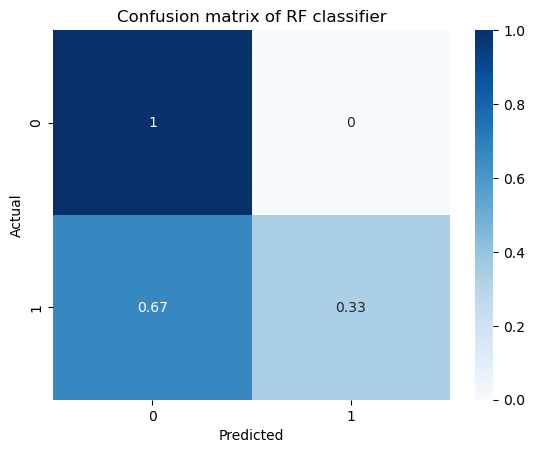

In [127]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of RF classifier')
plt.show()

In [128]:
from sklearn.svm import SVC
# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = svm.score(X_test, y_test)
print(f'SVM accuracy: {accuracy}')

SVM accuracy: 0.8333333333333334


Seaborn confusion matrix

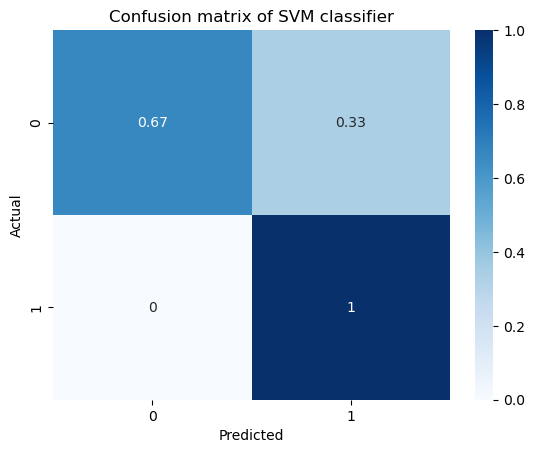

In [129]:


# Plot the confusion matrix
cm = confusion_matrix(y_test, svm.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of SVM classifier')
plt.show()

In [130]:


y = Group2_valence
y = np.array(y)

selector = SelectKBest(f_classif, k=10)
Group2_processed_fit = selector.fit_transform(Group2_processed, Group2_valence)


Group2_processed_fit = np.array(Group2_processed_fit)


std = StandardScaler()
Group2_processed_std = std.fit_transform(Group2_processed_fit)
print(Group2_processed_std.shape)
print(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Group2_processed_std, y, test_size=0.2, random_state=42)



(30, 10)
[0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0.]


/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [131]:
# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = rf.score(X_test, y_test)
print(f'Random Forest accuracy: {accuracy}')


Random Forest accuracy: 0.6666666666666666


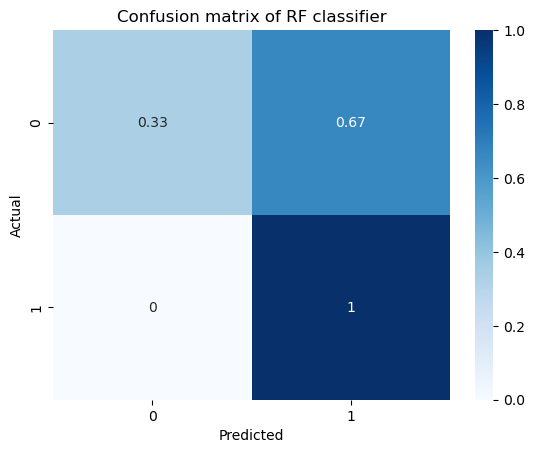

In [132]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of RF classifier')
plt.show()

In [133]:
# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = svm.score(X_test, y_test)
print(f'SVM accuracy: {accuracy}')

SVM accuracy: 0.3333333333333333


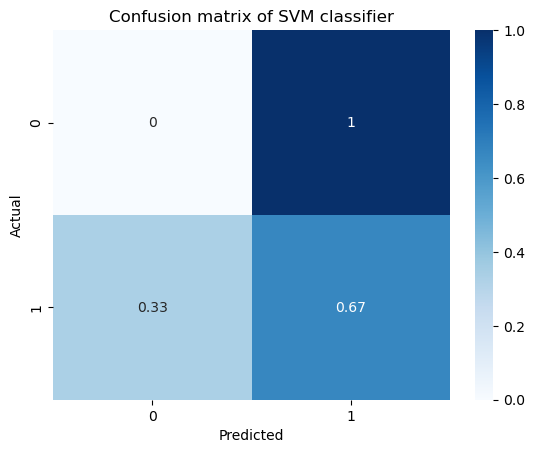

In [134]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, svm.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of SVM classifier')
plt.show()

In [135]:
y = np.array(Group_2_overall)
std = StandardScaler()
Group2_processed_std = std.fit_transform(Group2_processed)
X_train, X_test, y_train, y_test = train_test_split(Group2_processed_std, y, test_size=0.2, random_state=42)

In [136]:
# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = svm.score(X_test, y_test)
print(f'SVM accuracy: {accuracy}')

SVM accuracy: 0.5


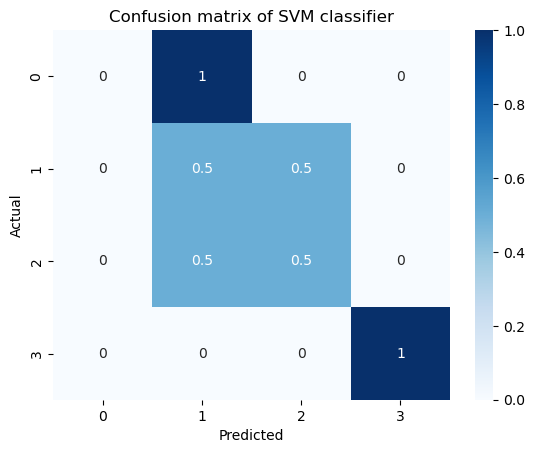

In [137]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, svm.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of SVM classifier')
plt.show()

In [138]:
# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = rf.score(X_test, y_test)
print(f'Random Forest accuracy: {accuracy}')


Random Forest accuracy: 0.5


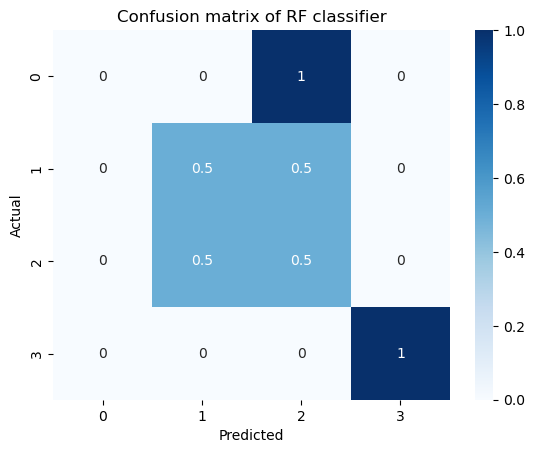

In [139]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of RF classifier')
plt.show()

In [140]:
selector = SelectKBest(f_classif, k=10)
Group3_processed_fit = selector.fit_transform(Group3_processed, Group3_arousal)

Group3_processed_fit = np.array(Group3_processed_fit)
Group3_arousal_score = np.array(Group3_arousal)


std = StandardScaler()
Group3_processed_std = std.fit_transform(Group3_processed_fit)
print(Group3_processed_std.shape)

(30, 10)


/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [141]:
X_train, X_test, y_train, y_test = train_test_split(Group3_processed_std, Group3_arousal_score, test_size=0.2, random_state=42)

In [142]:
# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = rf.score(X_test, y_test)
print(f'Random Forest accuracy: {accuracy}')

Random Forest accuracy: 0.5


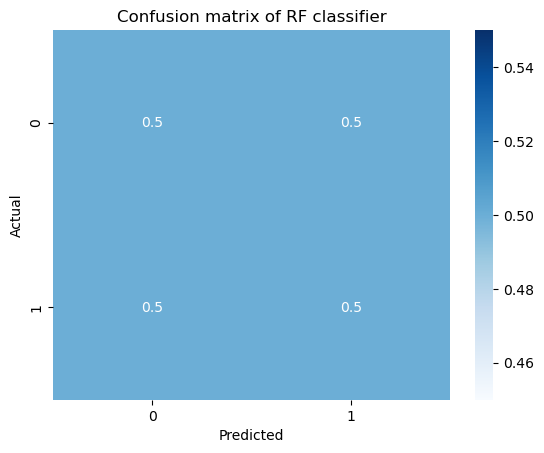

In [143]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of RF classifier')
plt.show()

In [144]:
# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = svm.score(X_test, y_test)
print(f'SVM accuracy: {accuracy}')

SVM accuracy: 0.5


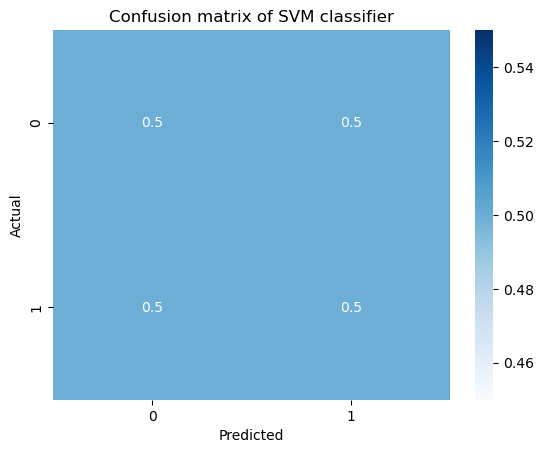

In [145]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of SVM classifier')
plt.show()

In [146]:
selector = SelectKBest(f_classif, k=10)
Group3_processed_fit = selector.fit_transform(Group3_processed, Group3_valence)

Group3_processed_fit = np.array(Group3_processed_fit)
Group3_valence_score = np.array(Group3_valence)


std = StandardScaler()
Group3_processed_std = std.fit_transform(Group3_processed_fit)
print(Group3_processed_std.shape)

(30, 10)


/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [147]:
X_train, X_test, y_train, y_test = train_test_split(Group3_processed_std, Group3_valence_score, test_size=0.2, random_state=42)

In [148]:
# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = rf.score(X_test, y_test)
print(f'Random Forest accuracy: {accuracy}')

Random Forest accuracy: 0.5


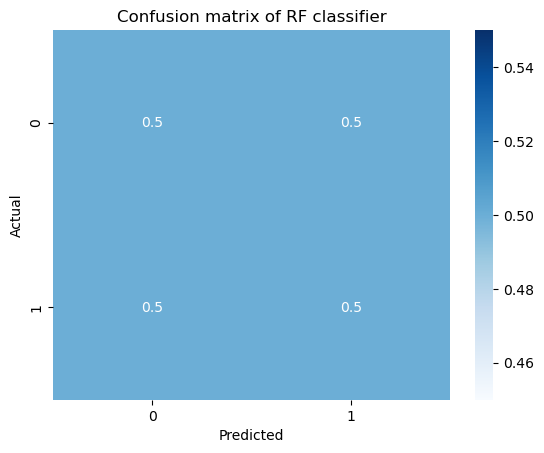

In [149]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of RF classifier')
plt.show()

In [154]:
Group1_scores = []
Group2_scores = []
Group3_scores = []

def emotion_definer(emotions):
    emotions = emotions.split(";")
    emotions = [x.strip(' ') for x in emotions]
    emotion_score = []
    for emotion in emotions:
        emotion = emotion.lower()
        if emotion == 'happy' or emotion == 'immersed' or emotion == 'excited' or emotion == 'hyped up' or emotion == 'hypedup' or emotion == 'delighted':
            emotion_score.append(2)
        elif emotion == 'sad' or emotion == 'angry' or ('frustrated' in emotion) or ('annoyed' in emotion) or emotion == 'bored' or emotion == 'sleepy' or emotion == 'tired' or emotion == 'nervous' or ('anxious' in emotion) or emotion == 'scared':
            emotion_score.append(1)
        elif emotion == 'tense' or emotion == 'confused' or  emotion == 'relaxed' or emotion == 'intrigued' or emotion == 'interest' or emotion == 'content' or emotion == 'calm' or emotion == 'mellow' or emotion == 'alright' or emotion == 'fine' or emotion == 'other':
            emotion_score.append(1)

    if not emotion_score:
        emotion_score.append(0)
    
    emotion = round(np.mean(emotion_score))
    
    if emotion is np.nan:
        emotion = 0

    return emotion
        
        
        
    
def load_Scores(location):
    print(location)
    folder = location[:-19]
    print(folder)
    var = os.listdir(folder)
    group = ''

    if "Group 1" in location:
        group = "Group 1"
    elif "Group 2" in location:
        group = "Group 2"
    elif "Group 3" in location:
        group = "Group 3"
        folder = folder + "/"

    for file in var:
        if group in file:
            if "xlsx" in file:
                location = folder + file
                data = pd.read_excel(location)
            elif "csv" in file:
                location = folder + file
                data = pd.read_csv(location)


    if "How would you rate this performance?" in data.columns:
        order = data["Watch ID"]
        scores = data["How would you rate this performance?"]
    elif "How did you rate the performance?" in data.columns:
        order = data["Watch ID"]
        scores  = data["How did you rate the performance?"]
    elif "How would you rate this performance?（10 is the best）" in data.columns:
        order = data["ID"]
        scores  = data["How would you rate this performance?（10 is the best）"]

    if "How would you describe your feelings through the performance?" in data.columns:
        emotions = data["How would you describe your feelings through the performance?"]
    elif "How do you describe your feeling during the programme? You may make multiple choices.\n" in data.columns:
        emotions = data["How do you describe your feeling during the programme? You may make multiple choices.\n"]
        
    emotions = emotions.apply(emotion_definer)
        
    return scores, order, emotions


def match_scores_to_data(scores, scores_order, emotions, data, data_order):
    matched_scores = []
    matched_data = []
    matched_emotions = []

    # Zip the scores and order and the data and data order
    scores_zip = zip(scores_order, scores, emotions)
    data_zip = zip(data_order, data)

    # Sort the zipped lists by order
    scores_zip = sorted(scores_zip, key=lambda x: x[0])
    data_zip = sorted(data_zip, key=lambda x: x[0])

    # Unzip the sorted lists
    sorted_scores_order, sorted_scores, sorted_emotions = zip(*scores_zip)
    sorted_data_order, sorted_data = zip(*data_zip)

    # Match the scores to the data using the order of each
    for i in range(min(len(sorted_scores_order), len(sorted_data_order))):
        if sorted_scores_order[i] == sorted_data_order[i]:
            matched_scores.append(sorted_scores[i])
            matched_data.append(sorted_data[i])
            matched_emotions.append(emotions[i])
    return matched_scores, matched_data, matched_emotions


def load_data(location):
    data1_loc = location + "/group1_processed.csv"
    data2_loc = location + "/group2_processed.csv"
    data3_loc = location + "/group3_processed.csv"
    data1 = pd.read_csv(data1_loc)
    data2 = pd.read_csv(data2_loc)
    data3 = pd.read_csv(data3_loc)

    order1 = data1["Order"].values
    order2 = data2["Order"].values
    order3 = data3["Order"].values

    data1 = data1.drop(["Order"], axis=1).values.tolist()
    data2 = data2.drop(["Order"], axis=1).values.tolist()
    data3 = data3.drop(["Order"], axis=1).values.tolist()


    return data1, data2, data3, order1, order2, order3


try:
    Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("/mnt/ArtHeart/Data/Group 1 Scores.xlsx")
    Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("/mnt/ArtHeart/Data/Group 2 Scores.xlsx")
    Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("/mnt/ArtHeart/Data/Group 3 Scores.csv")
    Group1_processed, Group2_processed, Group3_processed, Group1_order, Group2_order, Group3_order = load_data("/mnt/ArtHeart/Data")
except:
    try:
        Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 1 Scores.xlsx")
        Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 2 Scores.xlsx")
        Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 3 Scores.csv")
        Group1_processed, Group2_processed, Group3_processed, Group1_order, Group2_order, Group3_order = load_data("W:\PhD\ArtHeart\Data")

    except:
        Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("Data/Group 1 Scores.xlsx")
        Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("Data/Group 2 Scores.xlsx")
        Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("Data/Group 3 Scores.csv")
        Group1_processed, Group2_processed, Group3_processed, Group1_order, Group2_order, Group3_order = load_data("Data")





#Group1_scores, Group1_processed, Group1_emotions = match_scores_to_data(Group1_scores, Group1_scores_order, Group1_emotions, Group1_processed, Group1_order)
Group2_scores, Group2_processed, Group2_emotions = match_scores_to_data(Group2_scores, Group2_scores_order, Group2_emotions, Group2_processed, Group2_order)
Group3_scores, Group3_processed, Group3_emotions = match_scores_to_data(Group3_scores, Group3_scores_order, Group3_emotions, Group3_processed, Group3_order)


print(len(Group2_processed))
print(Group2_emotions)

/mnt/ArtHeart/Data/Group 1 Scores.xlsx
/mnt/ArtHeart/Data/
W:\PhD\ArtHeart\Data\Group 1 Scores.xlsx
W:\PhD\ArtHeart\Data\
Data/Group 1 Scores.xlsx
Data/
Data/Group 2 Scores.xlsx
Data/
Data/Group 3 Scores.csv
Data
30
[1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]


In [155]:
selector = SelectKBest(f_classif, k=15)
Group2_processed_fit = selector.fit_transform(Group2_processed, Group2_emotions)


Group2_processed_fit = np.array(Group2_processed_fit)


std = StandardScaler()
Group2_processed_std = std.fit_transform(Group2_processed_fit)
print(Group2_processed_std.shape)
print(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Group2_processed_std, Group2_emotions, test_size=0.2, random_state=42)

(30, 15)
[2 2 3 3 2 2 1 3 3 2 1 2 2 1 1 0 2 2 3 1 3 1 1 1 3 2 3 1 1 0]


/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [156]:
# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = rf.score(X_test, y_test)
print(f'Random Forest accuracy: {accuracy}')

Random Forest accuracy: 1.0


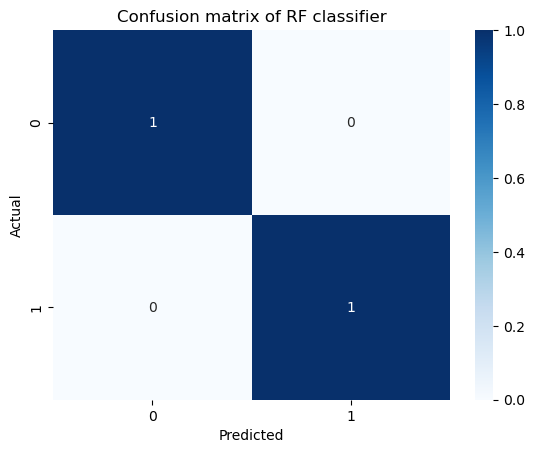

In [157]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of RF classifier')
plt.show()

In [188]:
X = []
X.extend(Group2_processed)
X.extend(Group3_processed)

y = []
y.extend(Group2_emotions)
y.extend(Group3_emotions)

print(len(X))
print(len(y))

60
60


In [192]:
selector = SelectKBest(f_classif, k=2)
X_fit = selector.fit_transform(X, y)


X_fit = np.array(X_fit)


std = StandardScaler()
X_fit_std = std.fit_transform(X_fit)
print(X_fit_std.shape)
print(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_fit_std, y, test_size=0.2, random_state=42)

(60, 2)
[1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2]


In [170]:
# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = rf.score(X_test, y_test)
print(f'Random Forest accuracy: {accuracy}')

Random Forest accuracy: 0.5


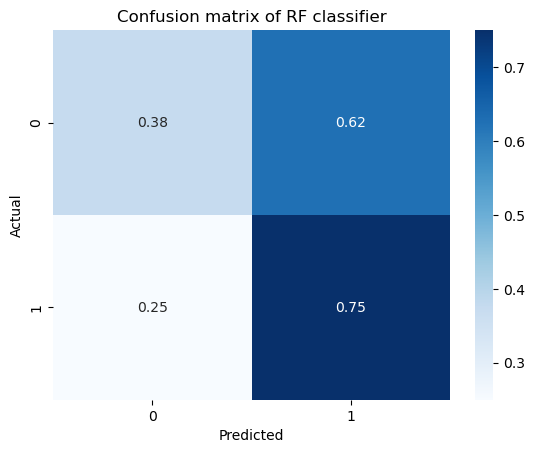

In [171]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of RF classifier')
plt.show()

In [172]:
# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = svm.score(X_test, y_test)
print(f'SVM accuracy: {accuracy}')

SVM accuracy: 0.5833333333333334


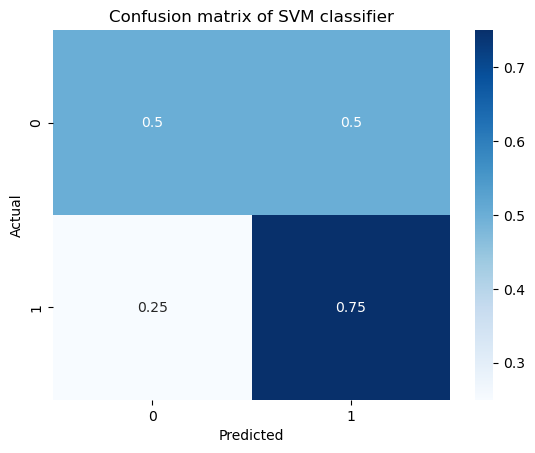

In [173]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, svm.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of SVM classifier')
plt.show()

In [184]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'C': [0.01 ,0.1, 1, 10, 100, 1000], 
              'gamma': [0.01 ,0.1, 1, 10, 100], 
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'degree': [2, 3, 4, 5, 6],
              'coef0': [0.0, 0.5, 1.0, 1.5, 2.0]}

# Create the SVM model
svm = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')


# Evaluate the model on the testing set
accuracy = grid_search.score(X_test, y_test)
print(f'SVM accuracy: {accuracy}')

/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'C': 100, 'coef0': 2.0, 'degree': 2, 'gamma': 1, 'kernel': 'sigmoid'}
Best score: 0.7066666666666667
SVM accuracy: 0.6666666666666666


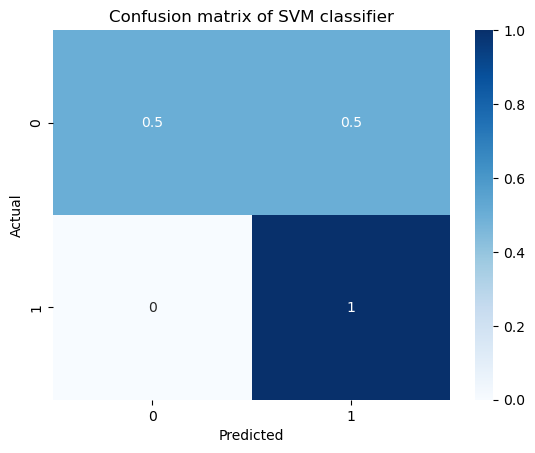

In [183]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, grid_search.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of SVM classifier')
plt.show()

In [186]:
# Define the parameter grid to search over
param_grid = {'n_estimators': [50, 100, 200, 500],
              'max_depth': [5, 10, 20, 50, 100, 200],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2', None]}

# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

# Evaluate the model on the testing set
accuracy = grid_search.score(X_test, y_test)
print(f'Random Forest accuracy: {accuracy}')


/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassif

KeyboardInterrupt: 

/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


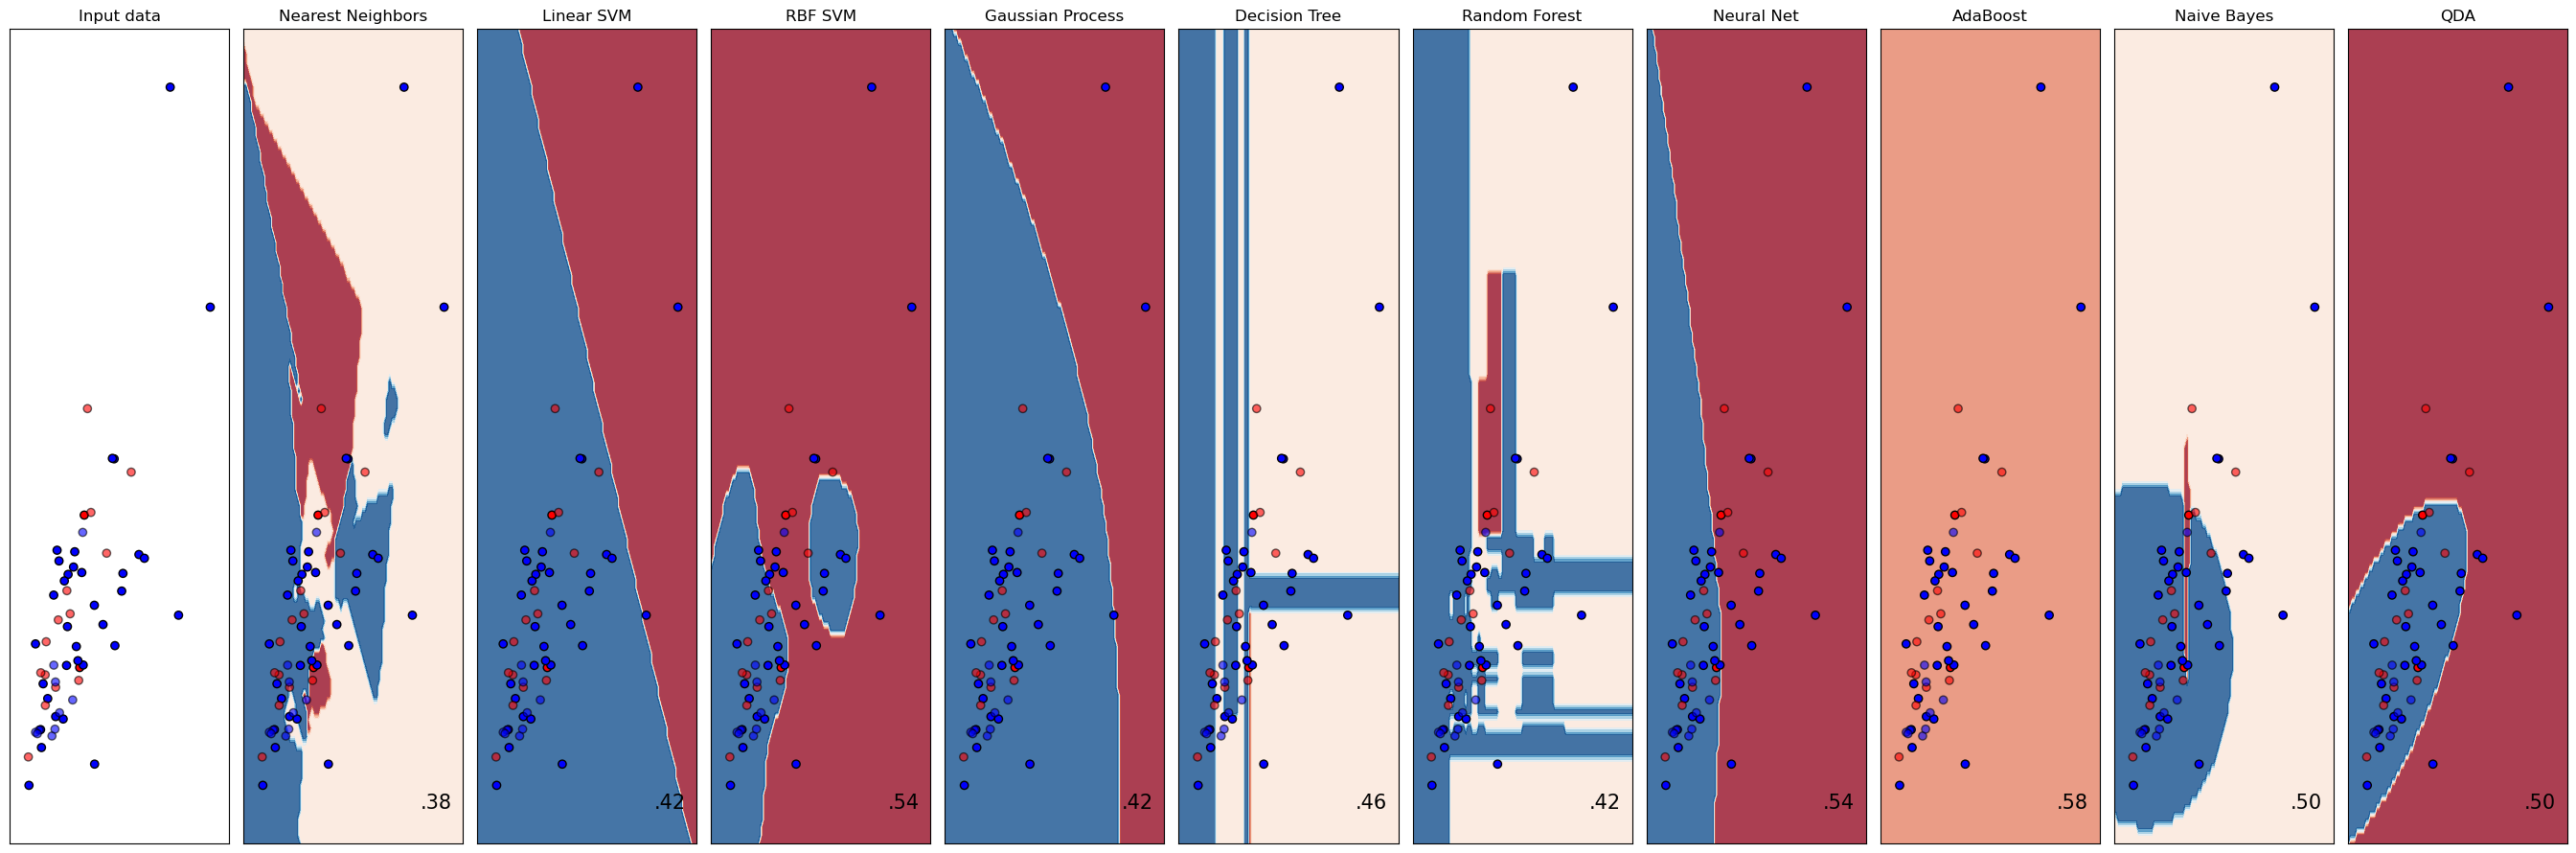

In [193]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay




names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

datasets = [(X_fit_std, y), ]


figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()